<a href="https://colab.research.google.com/github/Arazsh/Horse-vs.-Human-Classification-VGG19/blob/main/Horse_vs_Human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the Horse vs Human dataset from direct links povided by Laurence Moroney. It is possible to first download the dataset from Kaggle using 
#https://www.kaggle.com/sanikamal/horses-or-humans-dataset and then upload it here. 

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-10-13 05:35:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  66.5MB/s    in 2.1s    

2020-10-13 05:35:47 (66.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-10-13 05:35:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

num_horse_trn_imgs = 500 num_human_trn_imgs = 527 ttl_num_trn_imgs =  1027
num_horse_val_imgs = 128 num_human_val_imgs = 128 ttl_num_val_imgs =  256


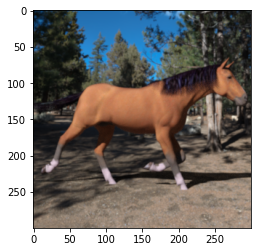

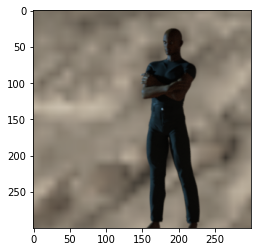

In [ ]:
import zipfile 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#Extracting the training images
zip_trn_read = zipfile.ZipFile('/tmp/horse-or-human.zip','r')
zip_trn_read.extractall('/tmp/horse-or-human-trn')

#Extracting the validation images
zip_val_read = zipfile.ZipFile('/tmp/validation-horse-or-human.zip','r')
zip_val_read.extractall('/tmp/horse-or-human-val')

#Creating the paths to horse and human image directories
horse_trn_dir = os.path.join('/tmp/horse-or-human-trn/horses')
human_trn_dir = os.path.join('/tmp/horse-or-human-trn/humans')

horse_val_dir = os.path.join('/tmp/horse-or-human-val/horses')
human_val_dir = os.path.join('/tmp/horse-or-human-val/humans')

#Finding the number of train and test images 
num_horse_trn_imgs = len([name for name in os.listdir(horse_trn_dir)])
num_human_trn_imgs = len([name for name in os.listdir(human_trn_dir)])

num_horse_val_imgs = len([name for name in os.listdir(horse_val_dir)])
num_human_val_imgs = len([name for name in os.listdir(human_val_dir)])


print('num_horse_trn_imgs =',num_horse_trn_imgs, 'num_human_trn_imgs =',num_human_trn_imgs,
      'ttl_num_trn_imgs = ', num_horse_trn_imgs+num_human_trn_imgs)

print('num_horse_val_imgs =',num_horse_val_imgs, 'num_human_val_imgs =',num_human_val_imgs,
      'ttl_num_val_imgs = ', num_horse_val_imgs+num_human_val_imgs)

#Displaying one random horse image and one random human image form training dataset 
exmp_trn_hrs_path = os.path.join(horse_trn_dir,
                                         os.listdir(horse_trn_dir)[random.randint(0,num_horse_trn_imgs-1)]) 
exmp_trn_hrs = mpimg.imread(exmp_trn_hrs_path)
                                    
plt.imshow(exmp_trn_hrs)
plt.show()

exmp_trn_hmn_path = os.path.join(human_trn_dir,
                                         os.listdir(human_trn_dir)[random.randint(0,num_human_trn_imgs-1)])
exmp_trn_hmn = mpimg.imread(exmp_trn_hmn_path)
                                         
plt.imshow(exmp_trn_hmn)
plt.show()

In [ ]:
#Preparing the train and validation data for the model using ImageDataGenerator and flow_from_directory

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Training images are normalized. For the training set, image augmentation is used to reduce overfitting.
train_data = ImageDataGenerator(
      rescale = 1./255)#,
      #rotation_range=15,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest')

#Testing images are normalized.
validation_data = ImageDataGenerator(rescale = 1/255)


# Flow training images in batches of 128 using train_data generator
train_generator = train_data.flow_from_directory(
        '/tmp/horse-or-human-trn',  # This is the source directory for training images
        target_size=(150, 150),  # All images are resized to 150x150
        batch_size=128,
        #Since binary_crossentropy loss is used in the model, binary label is assigned
        class_mode='binary')


# Flow validation images in batches of 32 using validation_data generator
validation_generator = validation_data.flow_from_directory(
        '/tmp/horse-or-human-val',  # This is the source directory for training images
        target_size=(150, 150),  # All images are resized to 150x150
        batch_size=32,
        #Since binary_crossentropy loss is used in the model, binary label is assigned
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
#Loading the VGG19 neural network with ImageNet weights and freezing its layers

from tensorflow.keras import layers
from tensorflow.keras import Model

#Loading VGG19

from tensorflow.keras.applications.vgg19 import VGG19

pre_trained_model = VGG19(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

#Freezing model layers
for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

#Extracting the convolutional block of VGG19
last_layer = pre_trained_model.get_layer('block5_conv4')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
#Building the model. Four dense layers are added to the convolutional block of VGG19  
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layers
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)
# Add a dropout rate of 0.2
#x = layers.Dropout(0.2)(x) 
# Add a final sigmoid layer for classification 
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [ ]:
#Defining the callbacks class to stop training after a specific training and validation accuracy
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end (self, epoch, logs={}):
    if(logs.get('accuracy')>0.999 and logs.get('val_accuracy')>0.99):
      print("\nThe training accuracy is >99.9% and the validation accuracy is >9%; training is enough")
      self.model.stop_training = True

callbacks = myCallback()


history = model.fit(train_generator, steps_per_epoch=8,
                    epochs=30, verbose=1,validation_data = validation_generator, validation_steps=8 ,callbacks=[callbacks])

Epoch 1/30
8/8 [==============================] - 7s 906ms/step - loss: 0.9293 - accuracy: 0.6719 - val_loss: 0.2668 - val_accuracy: 0.9102
Epoch 2/30
8/8 [==============================] - 7s 929ms/step - loss: 0.2194 - accuracy: 0.9188 - val_loss: 0.1652 - val_accuracy: 0.9414
Epoch 3/30
8/8 [==============================] - 7s 851ms/step - loss: 0.0787 - accuracy: 0.9932 - val_loss: 0.1101 - val_accuracy: 0.9766
Epoch 4/30
8/8 [==============================] - 7s 919ms/step - loss: 0.1779 - accuracy: 0.9055 - val_loss: 0.1233 - val_accuracy: 0.9492
Epoch 5/30
8/8 [==============================] - 6s 809ms/step - loss: 0.0237 - accuracy: 0.9978 - val_loss: 0.1030 - val_accuracy: 0.9531
Epoch 6/30
8/8 [==============================] - 7s 836ms/step - loss: 0.0104 - accuracy: 0.9989 - val_loss: 0.1317 - val_accuracy: 0.9531
Epoch 7/30
8/8 [==============================] - 7s 834ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9688
Epoch 8/30
8/8 [====

In [ ]:
#Uploading random horse and human images to test the model accuracy
from google.colab import files
from keras.preprocessing import image
import numpy as np

non_dataset_imgs = files.upload()

for data in non_dataset_imgs.keys():
#Feeding the images into the model
  data_path = '/content/' + data
  img = image.load_img(data_path, target_size=(150, 150))
  npImg = image.img_to_array(img)
  npImg = np.expand_dims(npImg/255, axis=0)
  images = np.vstack([npImg])
#Classifying the images
  hrsORhmn = model.predict(images, batch_size=10)
  print(hrsORhmn[0])
  if hrsORhmn[0]>0.5:
    print(data + " is a human")
  else:
    print(data + " is a horse")

Saving hor0.jpeg to hor0.jpeg
Saving hor1.jpeg to hor1.jpeg
Saving hor2.jpeg to hor2.jpeg
Saving hor3.jpeg to hor3.jpeg
Saving hor4.jpeg to hor4.jpeg
Saving hor5.jpeg to hor5.jpeg
Saving hor6.jpeg to hor6.jpeg
Saving hor7.jpeg to hor7.jpeg
Saving hor8.jpeg to hor8.jpeg
Saving hor9.jpeg to hor9.jpeg
Saving hor10.jpeg to hor10.jpeg
Saving hor11.jpeg to hor11.jpeg
Saving hor12.jpeg to hor12.jpeg
Saving hor13.jpeg to hor13.jpeg
Saving hor14.jpeg to hor14.jpeg
Saving hum0.jpeg to hum0.jpeg
Saving hum1.jpeg to hum1.jpeg
Saving hum2.jpeg to hum2.jpeg
Saving hum3.jpeg to hum3.jpeg
Saving hum4.jpeg to hum4.jpeg
Saving hum5.jpeg to hum5.jpeg
Saving hum6.jpeg to hum6.jpeg
Saving hum7.jpeg to hum7.jpeg
Saving hum8.jpeg to hum8.jpeg
Saving hum9.jpeg to hum9.jpeg
Saving hum10.jpeg to hum10.jpeg
Saving hum11.jpeg to hum11.jpeg
Saving hum12.jpeg to hum12.jpeg
Saving hum13.jpeg to hum13.jpeg
Saving hum14.jpeg to hum14.jpeg
[0.09315988]
hor0.jpeg is a horse
[4.5960496e-05]
hor1.jpeg is a horse
[2.195036

input_2 (1, 150, 150, 3)
block1_conv1 (1, 150, 150, 64)
block1_conv2 (1, 150, 150, 64)
block1_pool (1, 75, 75, 64)
block2_conv1 (1, 75, 75, 128)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


block2_conv2 (1, 75, 75, 128)
block2_pool (1, 37, 37, 128)
block3_conv1 (1, 37, 37, 256)
block3_conv2 (1, 37, 37, 256)
block3_conv3 (1, 37, 37, 256)
block3_conv4 (1, 37, 37, 256)
block3_pool (1, 18, 18, 256)
block4_conv1 (1, 18, 18, 512)
block4_conv2 (1, 18, 18, 512)
block4_conv3 (1, 18, 18, 512)
block4_conv4 (1, 18, 18, 512)
block4_pool (1, 9, 9, 512)
block5_conv1 (1, 9, 9, 512)
block5_conv2 (1, 9, 9, 512)
block5_conv3 (1, 9, 9, 512)
block5_conv4 (1, 9, 9, 512)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


flatten_1 (1, 41472)
dense_4 (1, 512)
dense_5 (1, 64)
dense_6 (1, 16)
dense_7 (1, 1)


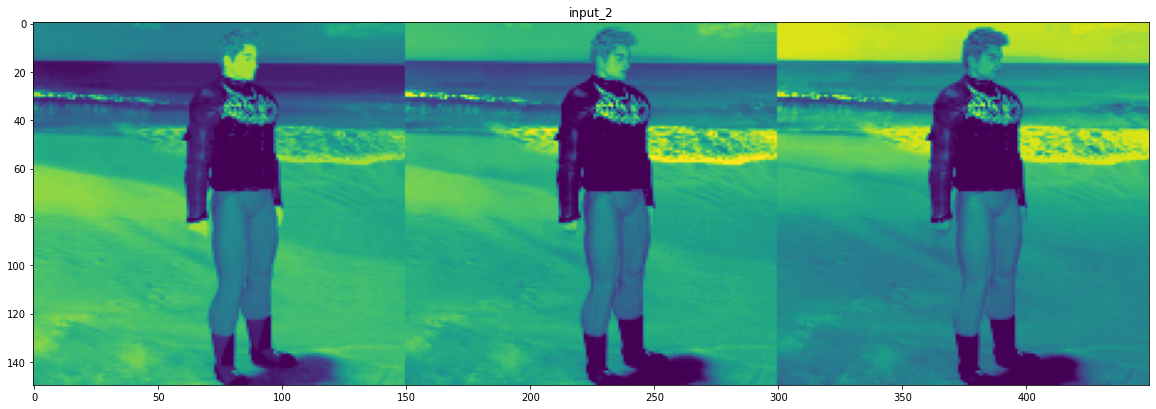

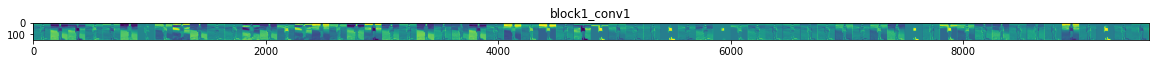

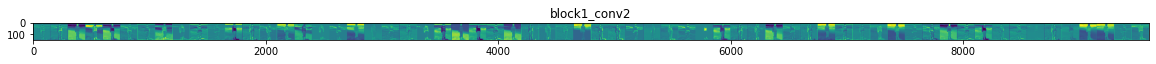

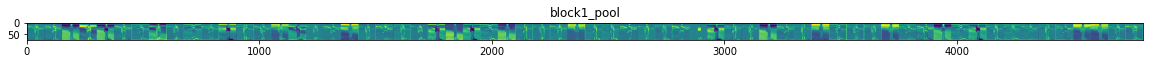

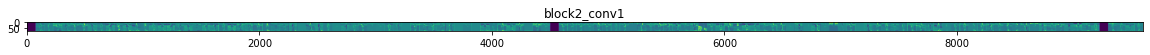

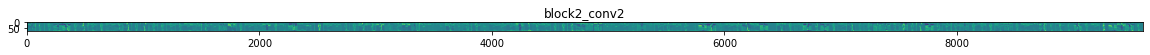

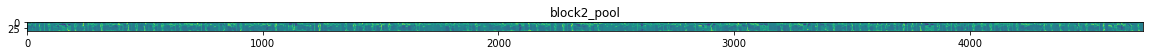

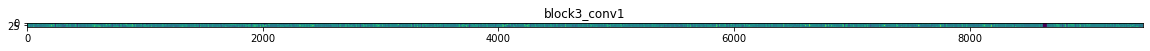

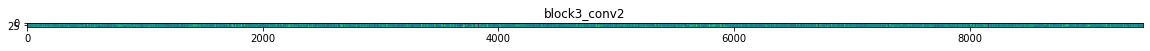

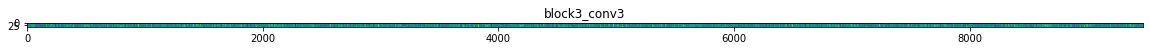

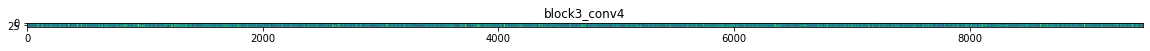

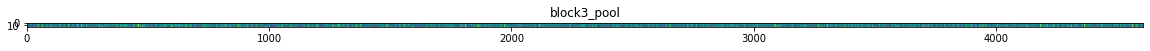

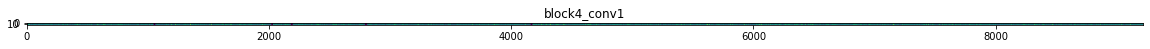

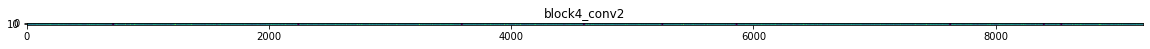

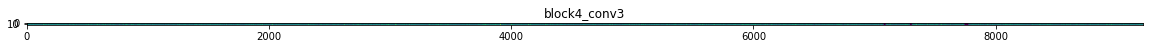

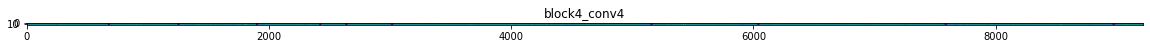

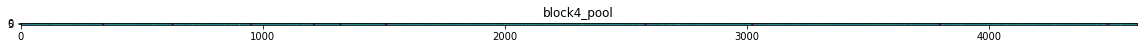

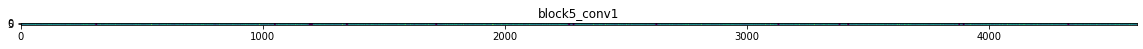

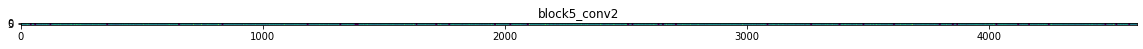

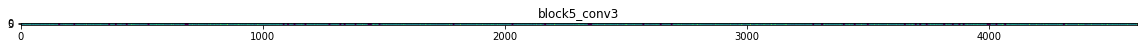

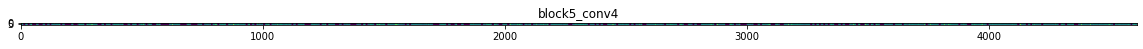

In [ ]:
#Visualizing the output of convolutional layers
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#Getting access to the output of model layers
layer_outputs = [layer.output for layer in model.layers[0:]]
#Defining a new models based on original model input and the output of its successive layers
new_models = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

#Taking a random image out of the training set 
rnd_img_path = random.choice([exmp_trn_hrs_path] + [exmp_trn_hmn_path])
rnd_img = load_img(rnd_img_path, target_size=(150, 150))  

# The model accepts the Numpy array
x = img_to_array(rnd_img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
# Rescale by 1/255
x /= 255


#Feeding the random image into the new models 
filtered_results = new_models.predict(x)

#Extracting the name of layers for plotting
names = [layer.name for layer in model.layers]

#Plotting
for name, filtered_result in zip(names,filtered_results):
  print(name, filtered_result.shape)
  if len(filtered_result.shape) == 4: #Reading the output of non dense layers
    n = filtered_result.shape[-1]  #Number of filters in the layer ==> shape=(1, size, size, n)
    size = filtered_result.shape[1]
    # Creating a matrix for concatenating filtered results 
    concat = np.zeros((size, size * n))
    for i in range(n):
      # Converting Numpy features to uint8 image format 
      x = filtered_result[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      concat[:, i * size : (i + 1) * size] = x
    # Displaying the concatenated filtered results for each layer
    scale = 20. / n
    plt.figure(figsize=(scale * n, scale))
    plt.title(name)
    plt.grid(False)
    plt.imshow(concat, aspect='auto', cmap='viridis')